Versione di TensorFlow: 2.18.0
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Numero totale di immagini nel training set: 50000
Dimensione delle immagini di training: (50000, 32, 32, 3)
Numero totale di immagini nel test set: 10000
Dimensione delle immagini di test: (10000, 32, 32, 3)


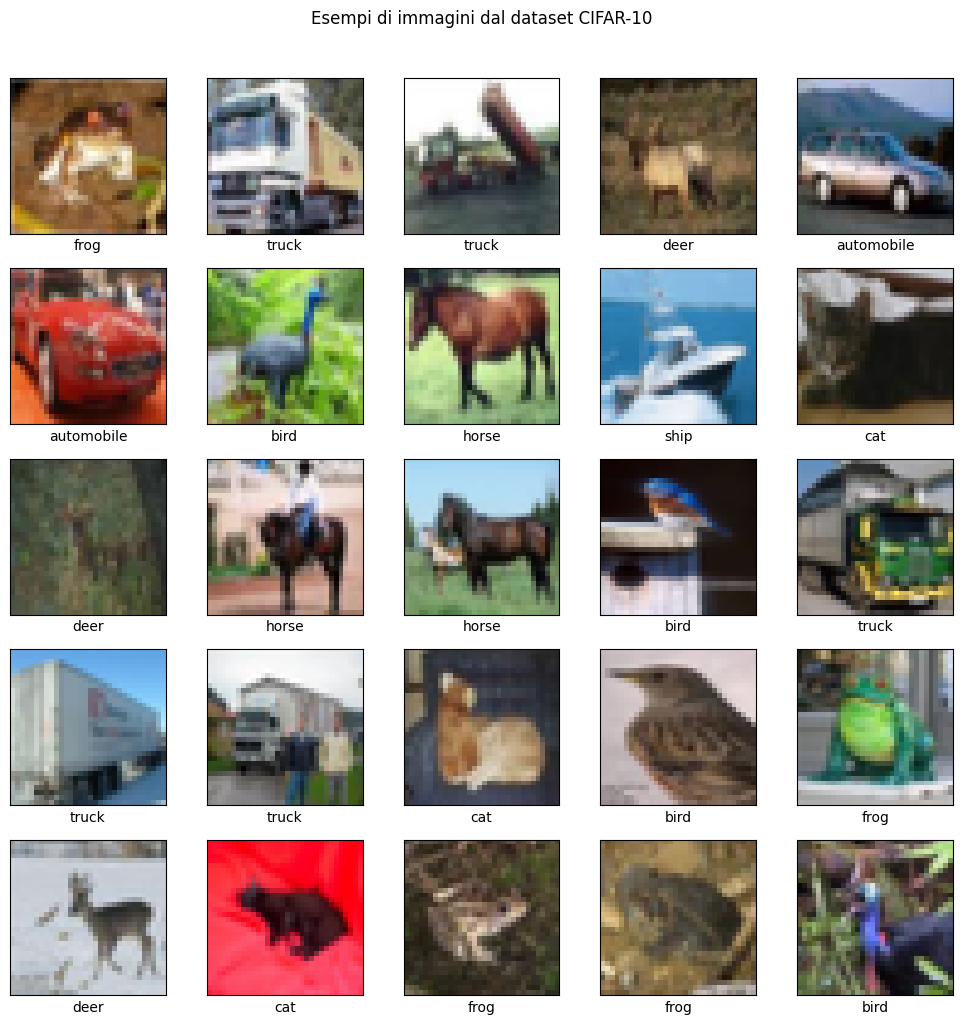


Dati CIFAR-10 caricati e pre-elaborati. Pronti per definire il modello!


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

print(f"Versione di TensorFlow: {tf.__version__}")

# 1. Carica il dataset CIFAR-10
# I dati vengono automaticamente scaricati e divisi in training e test set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# CIFAR-10 ha 10 classi. Definiamo i nomi delle classi per una migliore visualizzazione.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Pre-elaborazione dei dati: Normalizzazione dei pixel
# Le immagini sono in formato uint8 (valori da 0 a 255).
# Le reti neurali preferiscono input con valori più piccoli, solitamente tra 0 e 1.
# Dividiamo per 255.0 per normalizzare.
train_images, test_images = train_images / 255.0, test_images / 255.0

# --- Puoi visualizzare un esempio per vedere cosa hai caricato ---
print(f"\nNumero totale di immagini nel training set: {len(train_images)}")
print(f"Dimensione delle immagini di training: {train_images.shape}") # (50000, 32, 32, 3)
print(f"Numero totale di immagini nel test set: {len(test_images)}")
print(f"Dimensione delle immagini di test: {test_images.shape}") # (10000, 32, 32, 3)


# 3. Visualizza le prime 25 immagini del training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Le etichette sono numpy array, prendiamo il primo elemento
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Esempi di immagini dal dataset CIFAR-10", y=1.02)
plt.tight_layout()
plt.show()

print("\nDati CIFAR-10 caricati e pre-elaborati. Pronti per definire il modello!")

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models # Assicurati che siano importati

# 1. Definisci l'architettura della CNN
# Useremo l'API Sequential per costruire il modello strato dopo strato.
model = models.Sequential()

# Blocco 1: Convoluzione e Pooling
# Input shape per CIFAR-10 è (32, 32, 3) -> larghezza, altezza, canali RGB
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Blocco 2: Convoluzione e Pooling (più filtri per catturare pattern più complessi)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Blocco 3: Convoluzione (ancora più filtri)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 2. Appiattisci l'output degli strati convoluzionali per gli strati Dense
model.add(layers.Flatten())

# 3. Strati Dense (Fully Connected) per la classificazione
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 output per 10 classi, con softmax per le probabilità

# 4. Visualizza un riassunto del modello per vedere gli strati e i parametri
print("\n--- Riassunto del Modello CNN ---")
model.summary()

print("\nModello CNN definito con successo!")


--- Riassunto del Modello CNN ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)


Modello CNN definito con successo!


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models # Assicurati che siano importati

# Il tuo modello 'model' dovrebbe essere già definito dalla cella precedente

# 1. Compila il Modello
# optimizer: 'adam' è una scelta robusta e predefinita di Keras.
# loss: SparseCategoricalCrossentropy è usata perché le tue etichette (train_labels, test_labels)
#       sono numeri interi (0, 1, 2, ... 9) e non sono in formato one-hot encoded.
# metrics: ['accuracy'] per monitorare la percentuale di previsioni corrette.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("\nModello compilato con successo!")
print(f"Ottimizzatore: {model.optimizer.get_config()['name']}")
print(f"Funzione di costo: {model.loss.name}")
print(f"Metriche monitorate: {model.metrics_names}")


Modello compilato con successo!
Ottimizzatore: adam
Funzione di costo: sparse_categorical_crossentropy
Metriche monitorate: ['loss', 'compile_metrics']


In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models # Assicurati che siano importati

# Assicurati che 'model' sia già definito e compilato dalle celle precedenti.
# Assicurati che 'train_images', 'train_labels', 'test_images', 'test_labels' siano caricate e normalizzate.

# 1. Addestra il Modello
print("\n--- Avvio del Training del Modello CNN ---")
history = model.fit(train_images, train_labels, epochs=10, # Addestriamo per 10 epoche
                    validation_data=(test_images, test_labels)) # Valutiamo sul set di test ad ogni epoca

print("\nTraining completato!")


--- Avvio del Training del Modello CNN ---
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.3632 - loss: 1.7311 - val_accuracy: 0.5617 - val_loss: 1.2237
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - accuracy: 0.5888 - loss: 1.1645 - val_accuracy: 0.6473 - val_loss: 1.0133
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.6582 - loss: 0.9807 - val_accuracy: 0.6583 - val_loss: 0.9710
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.6935 - loss: 0.8743 - val_accuracy: 0.6870 - val_loss: 0.9127
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.7248 - loss: 0.8015 - val_accuracy: 0.6817 - val_loss: 0.9301
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7377 - loss: 0.7486 - val_accuracy: 0.6666 - val_loss: 1.0010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7558 - loss: 0.6909 - val_accuracy: 0.7146 - val_loss: 0.8279
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7773 - loss: 0.63

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt # Assicurati che sia importato

# Assicurati che 'model', 'test_images', 'test_labels' siano disponibili
# Assicurati che 'history' sia l'oggetto restituito da model.fit()

# Valutazione finale del modello sul set di test
print("\n--- Valutazione Finale del Modello sul Test Set ---")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'\nAccuratezza finale sul test set: {test_acc:.4f}')
print(f'Loss finale sul test set: {test_loss:.4f}')


--- Valutazione Finale del Modello sul Test Set ---
313/313 - 3s - 8ms/step - accuracy: 0.7160 - loss: 0.8455

Accuratezza finale sul test set: 0.7160
Loss finale sul test set: 0.8455


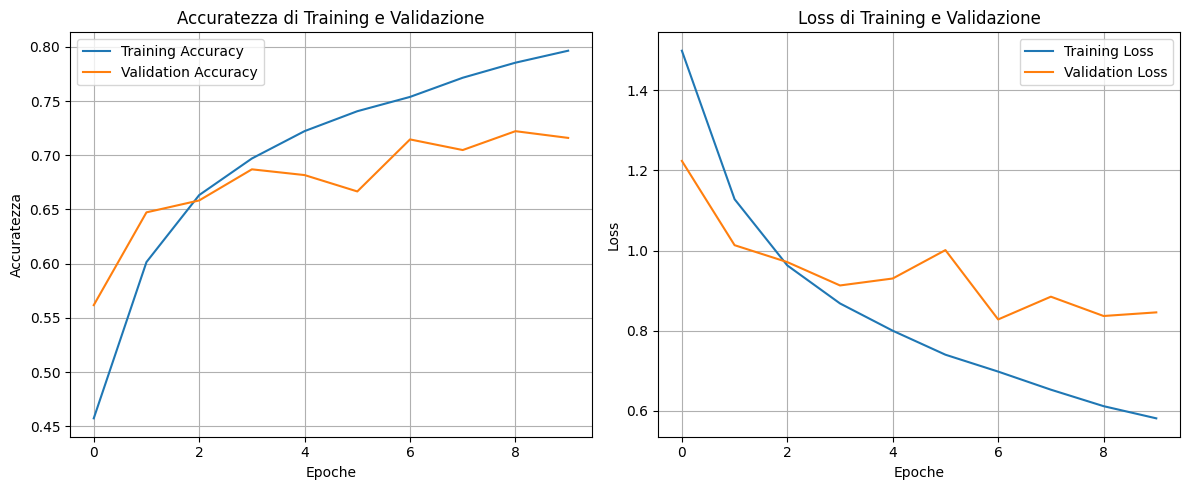


Grafici di training visualizzati. Puoi analizzare l'andamento del tuo modello.


In [7]:
# Assicurati che 'history' sia l'oggetto restituito da model.fit()

# Grafici per accuratezza e loss
plt.figure(figsize=(12, 5))

# Grafico dell'Accuratezza
plt.subplot(1, 2, 1) # 1 riga, 2 colonne, primo grafico
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.title('Accuratezza di Training e Validazione')
plt.legend()
plt.grid(True)

# Grafico della Loss
plt.subplot(1, 2, 2) # 1 riga, 2 colonne, secondo grafico
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Loss di Training e Validazione')
plt.legend()
plt.grid(True)

plt.tight_layout() # Aggiusta la spaziatura per evitare sovrapposizioni
plt.show()

print("\nGrafici di training visualizzati. Puoi analizzare l'andamento del tuo modello.")

In [8]:
import tensorflow as tf

# Assicurati che il tuo modello 'model' sia già definito e addestrato

# Definisci il percorso e il nome del file dove salvare il modello
# È buona pratica usare l'estensione .keras
model_save_path = 'cifar10_cnn_model.keras'

# Salva l'intero modello (architettura, pesi, stato dell'ottimizzatore)
model.save(model_save_path)

print(f"Modello TensorFlow/Keras salvato con successo in: {model_save_path}")

Modello TensorFlow/Keras salvato con successo in: cifar10_cnn_model.keras
